# Neural Network MNIST Example code
This code is intended as a superviced learning example in machine learning. The code uses tflearn as the base liabray. 

First step is to load basic Libaries

In [1]:
# Load Basic Libaries
import matplotlib.pyplot as plt
import numpy as np
import tflearn

Next we load the Modified National Institute of Standards and Technology (MNIST) data set.

In [2]:
# Data loading
X, Y, testX, testY = tflearn.datasets.mnist.load_data(one_hot=True)
numberOfTestCases = 1000
valX = testX[0:numberOfTestCases]
valY = testY[0:numberOfTestCases]
testX = testX[numberOfTestCases:testX.shape[0]]
testY = testY[numberOfTestCases:testY.shape[0]]

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


Let us have a look at some examples. 

Presenting some examples from the MNIST data set.


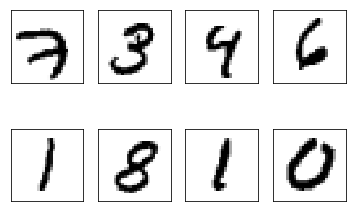

In [3]:
print("Presenting some examples from the MNIST data set.")
xSize = 4
ySize = 2
for i in range(0,xSize*ySize):
    plt.subplot(ySize, xSize, i+1)
    plt.imshow(X[i].reshape([28,28]), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])   
plt.show()

# Building the Neural Network 

- 784 Inputs (One for each pixel)
- 64 Nodes at the first hidden level
- 64 Nodes at the second hidden level
- 10 Output nodes

Softmax ensures that the sum of all ten outputs is one. 

In [4]:
# Building a simple neural network
input_layer = tflearn.input_data(shape=[None, 784])

hidden1_layer = tflearn.fully_connected(input_layer, 64)

hidden2_layer = tflearn.fully_connected(hidden1_layer, 64)

output_layer = tflearn.fully_connected(hidden2_layer, 10, activation='softmax')


Using Stochastic Gradient Descent (SGD) and set meta parameters. 
- Set Learning Rate to 0.1
- Set Learning Rate Decay to 0.96
- Set Decay step to 1000

In [5]:
sgd = tflearn.SGD(learning_rate=0.1, lr_decay=0.9, decay_step=1000)
net = tflearn.regression(output_layer, optimizer=sgd, loss='categorical_crossentropy')

Let us start the actual training. 

In [6]:
# Training
model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(X, Y, n_epoch=4,validation_set=(valX, valY),show_metric=True,run_id="example_model")

Training Step: 3439  | total loss: 0.33399 | time: 8.022s
| SGD | epoch: 004 | loss: 0.33399 - acc: 0.9135 -- iter: 54976/55000
Training Step: 3440  | total loss: 0.32759 | time: 9.043s
| SGD | epoch: 004 | loss: 0.32759 - acc: 0.9128 | val_loss: 0.30749 - val_acc: 0.9070 -- iter: 55000/55000
--


Let us take the newly trained model for a spin.

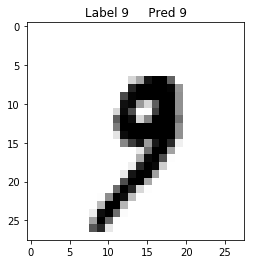

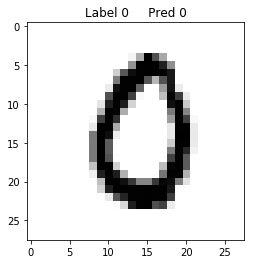

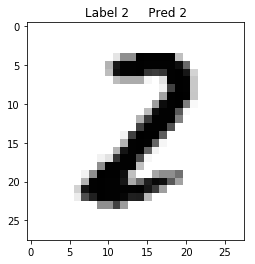

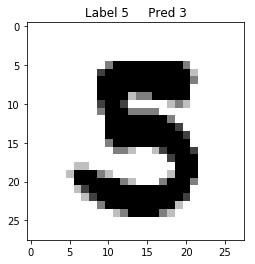

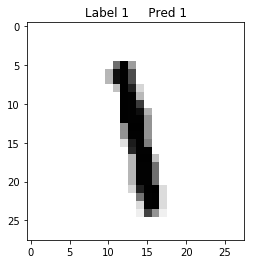

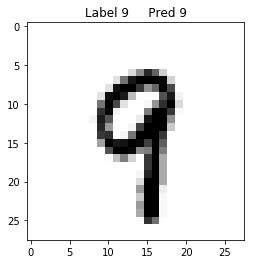

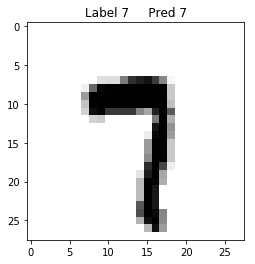

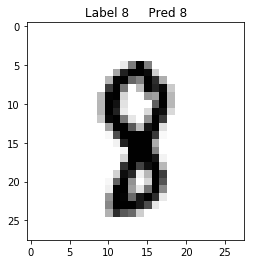

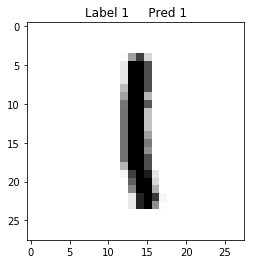

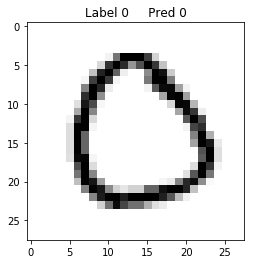

In [7]:
testPrediction = model.predict(testX)
predictedNumber = np.argmax(testPrediction, axis=1)

for i in range(0,10):
    plt.imshow(testX[i].reshape([28,28]), cmap='gray_r')
    label = testY[i].argmax(axis=0)
    plt.title('Label %d     Pred %d' % (label,predictedNumber[i]))
    plt.show()

It is equally interesting to have a look at where the model failed. 

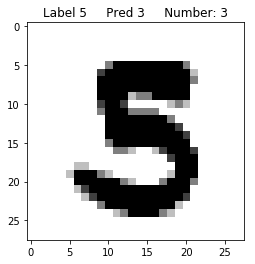

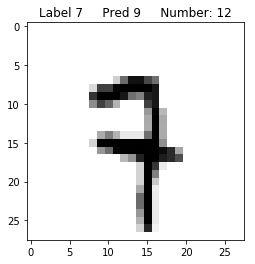

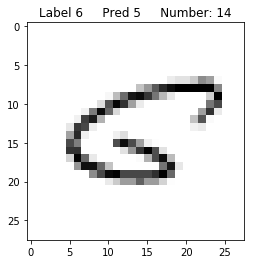

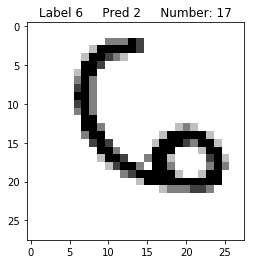

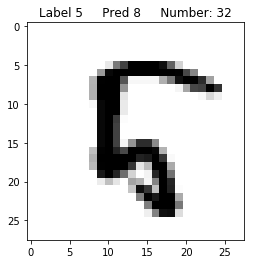

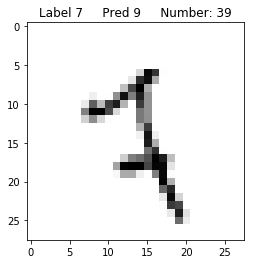

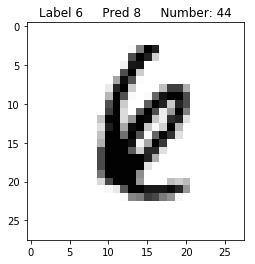

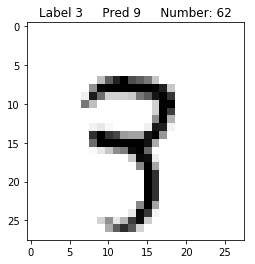

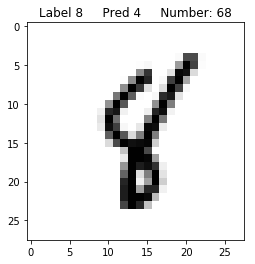

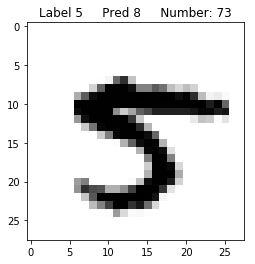

In [8]:
count = 0
for i in range(0,testY.shape[0]):
    label = testY[i].argmax(axis=0)
    
    if ( label != predictedNumber[i] and count < 10):
        plt.imshow(testX[i].reshape([28,28]), cmap='gray_r')
        plt.title('Label %d     Pred %d     Number: %d' % (label,predictedNumber[i],i))
        plt.show()
        count = count +1